https://gendai.media/articles/-/63904?page=3

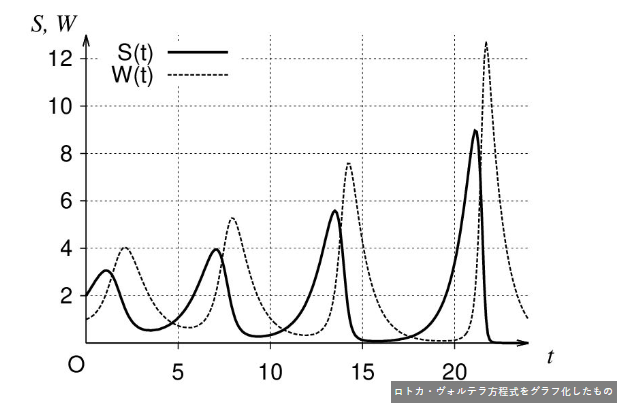

https://twitter.com/kimu3_slime/status/1608678692817080320?s=20&t=DN3hlMCpGLP6Q9HeHs8gaQ

In [1]:
using OrdinaryDiffEq
using StaticArrays
using Plots
default(fmt=:png, titlefontsize=12)

function LotkaVolterra(u, param, t)
    S, W = u
    p, q, r, s = param
    dS =  p*S - q*W*S
    dW = -r*W + s*W*S
    SVector(dS, dW)
end

param = [1.4, 0.7, 1.0, 1.0]
u0 = SVector(2.0, 1.0)
tspan = (0, 25)
prob = ODEProblem(LotkaVolterra, u0, tspan, param)

ODEProblem with uType SVector{2, Float64} and tType Int64. In-place: false
timespan: (0, 25)
u0: 2-element SVector{2, Float64} with indices SOneTo(2):
 2.0
 1.0

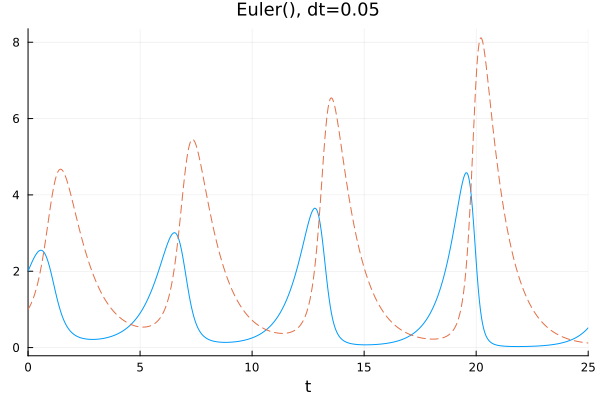

In [2]:
sol = solve(prob, Euler(); dt=0.05)
plot(sol; legend=false, ls=[:solid :dash], title="Euler(), dt=0.05")

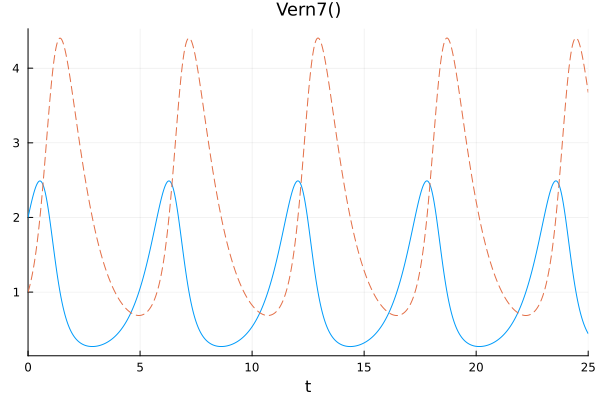

In [3]:
sol = solve(prob, Vern7())
plot(sol; legend=false, ls=[:solid :dash], title="Vern7()")

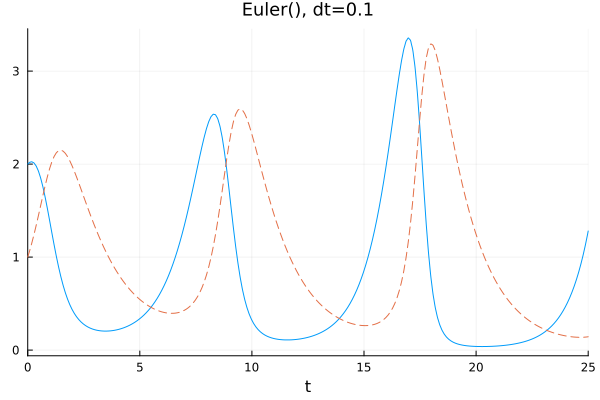

In [4]:
# See http://tomo-kumagai.eco.coocan.jp/2016_math_text_kenlo.pdf, pp.20-21

using OrdinaryDiffEq
using StaticArrays
using Plots
default(fmt=:png, titlefontsize=12)

function LotkaVolterra2(u, param, t)
    S, W = u
    (; α₁, α₁, β₁, β₂) = param
    dS =  α₁*S - β₁*S*W
    dW = -α₁*W + β₂*S*W
    SVector(dS, dW)
end

param = (α₁=1.2, α₂=1.1, β₁=0.6, β₂=0.7)
S0, W0 = 2.0, 1.0
u0 = SVector(S0, W0)
tspan = (0, 25)
prob = ODEProblem(LotkaVolterra, u0, tspan, param)
dt = 0.1
sol = solve(prob, Euler(); dt)
plot(sol; legend=false, ls=[:solid :dash], title="Euler(), dt=$dt")